In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('Weight_height.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,125
2,48,123
3,60,145
4,70,160


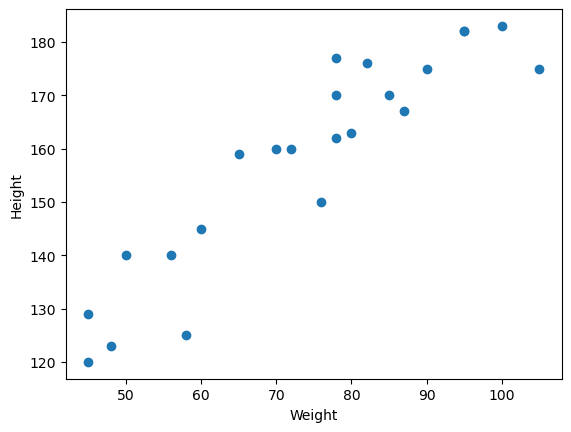

In [4]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.921284
Height,0.921284,1.000000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


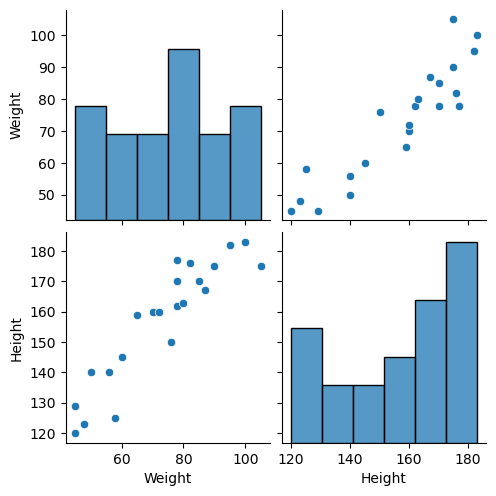

In [7]:
sns.pairplot(df)

In [10]:
# Independe and dependent features
X = df[['Weight']] ## Always remember that independent features should be dataframe or 2 dimesnional array
y=df['Height']   ## this variable can be a series or 1D array.

In [11]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [13]:
## Standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [15]:
## Apply linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)

regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [17]:
print(f"Coefficient or slop is: {regression.coef_}")
print(f"Intercept is: {regression.intercept_}")

Coefficient or slop is: [17.81386924]
Intercept is: 155.88235294117646


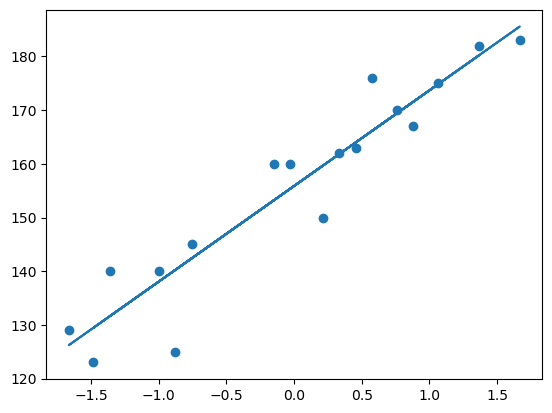

In [19]:
## plot Training data plot and best fit line

plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

### Prediction of the test data
1. predicted height output = intercept + coef_(Weight)
2. y_pred_test = regression.intercept_ + regression.coef_ * X_test

In [20]:
## Prediction for the test data
y_pred = regression.predict(X_test)

In [21]:
## perfromance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"The Mean squared error is: {mse}")
print(f"The mean absolute error is: {mae}")
print(f"The root mean squared error is: {rmse}")

The Mean squared error is: 119.78211426580515
The mean absolute error is: 9.751561944430335
The root mean squared error is: 10.944501554013556


#### R-squared

$$R^2 = 1 - \frac{SSR}{SST}$$

where
- R^2 is the coefficeint of determination
- SSR = sum of squares of residuals 
- SST = total sum of squares

In [23]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(f"The r-squared value for the model is= {score}")

The r-squared value for the model is= 0.724726708358188


#### Adjusted R squared 

$$ \text{Adjusted R-squared} = 1- \frac{(1-R^2)(n-1)}{n-k-1}$$

where 
- R^2 = is the R-squared value of the model,
- n = The number of observations
- k = The number of predictor variables


In [25]:
## displaying adjusted r squared value 
1 - (1-score)*(len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)

0.655908385447735

## OLS method

In [26]:
import statsmodels.api as sm 
model = sm.OLS(y_train, X_train).fit()

In [27]:
prediction = model.predict(X_test)
print(prediction)

[  5.96714165   5.96714165 -29.64526755  24.31292821  -8.06198925
  35.10456736]


In [28]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.2086
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                       0.654
Time:                        20:31:42   Log-Likelihood:                         -109.97
No. Observations:                  17   AIC:                                      221.9
Df Residuals:                      16   BIC:                                      222.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


so clearly the value of the coefficents and the intercept calulated is similar to what we used earlier method of Gradient Descent  method.


In [32]:
### Prediction for net data

prediction_new_weight = regression.predict(scaler.transform([[72]])) 
print(f"Height for the weight 72 Kg is: {prediction_new_weight}")

Height for the weight 72 Kg is: [155.3745111]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
new_weight = [[72]]
scaled_new_weight = scaler.transform(new_weight) # since we have standardized the training data, we mush use the standardize the weight

# Make the prediction
prediction_new_height = regression.predict(scaled_new_weight)

print(f"Height for the weight 72 Kg is: {prediction_new_height}")

Height for the weight 72 Kg is: [155.3745111]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
